In [39]:
from DOE import Anova_Block, Anova_NoBlock
from scipy import stats
import numpy as np

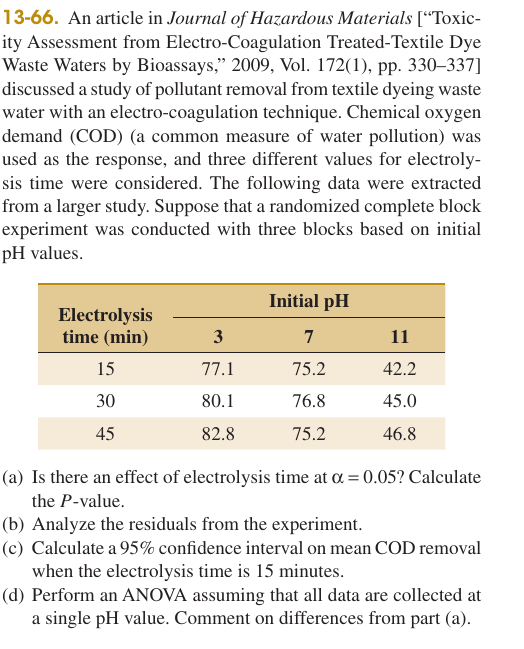

# Anova zonder blokken

In [23]:
n = 3
a = 3
alpha = 0.05
Data_nb = Anova_NoBlock("opdrachten.xlsx", alpha, n, a)

In [24]:
df, df_melt, names, mean = Data_nb.import_df("13.66")

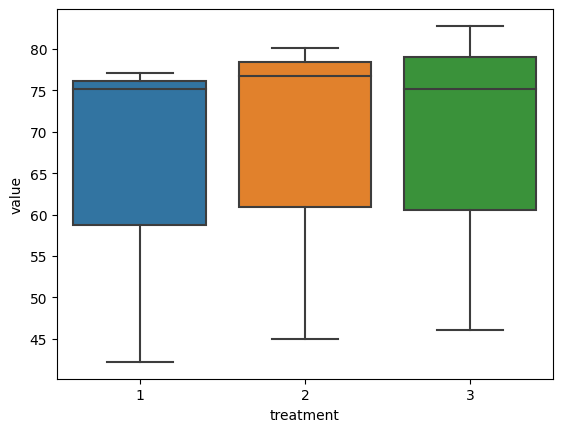

In [25]:
Data_nb.boxplot()

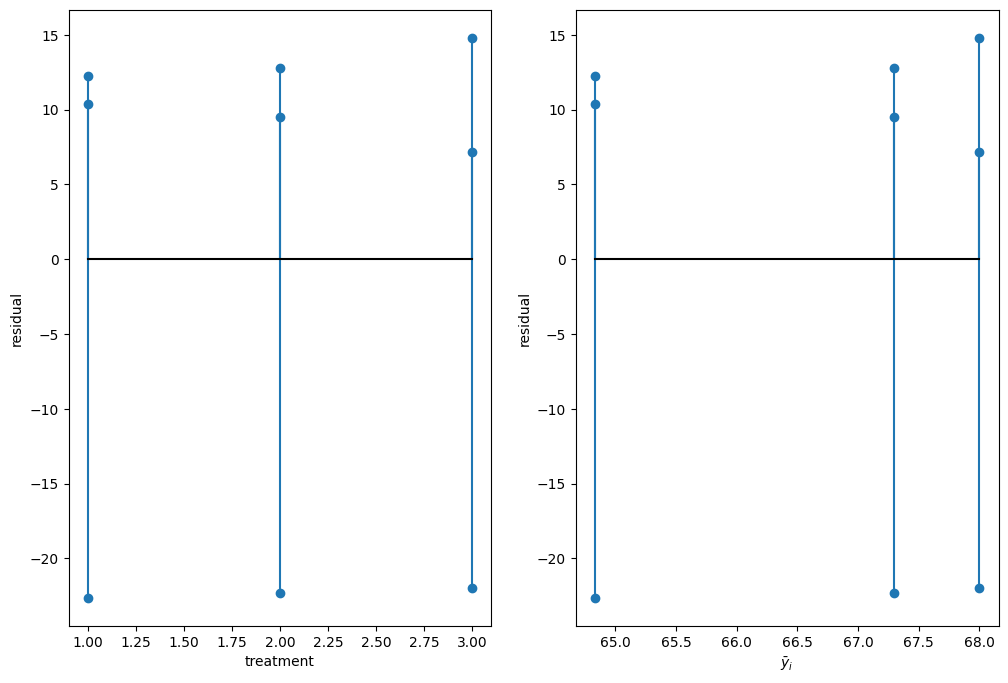

In [55]:
Data_nb.res_plot()

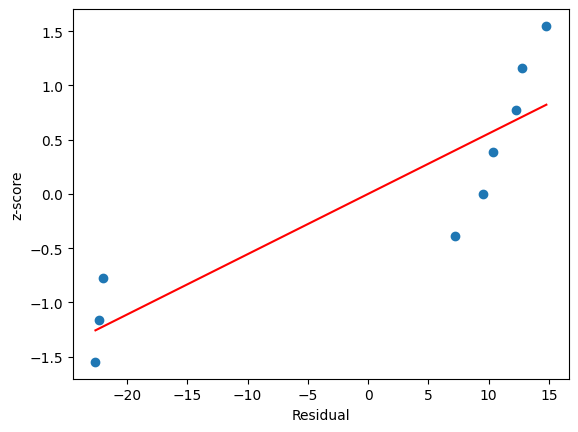

In [57]:
Data_nb.norm_plot()

In [34]:
df_melt, anova_table, pvalue, lsd, mse = Data_nb.anova()

H0 accepted
1-2: no significant difference 
1-3: no significant difference 
2-3: no significant difference 


In [28]:
Data_b = Anova_Block("opdrachten.xlsx", alpha, n, a)

In [29]:
df, df_melt, mean_row, mean_block = Data_b.melt("13.66")

In [30]:
df_melt, anova_table, pvalue, lsd = Data_b.anova()

H0 accepted
1-2: no significant difference 
1-3: SIGNIFICANT DIFFERENCE!
2-3: no significant difference 


In [33]:
anova_table

,sum_sq,df,F,PR(>F)
treatment,16.602222,2.0,3.639065,0.125790
block,2267.342222,2.0,496.981978,0.000016
Residual,9.124444,4.0,NaN,NaN


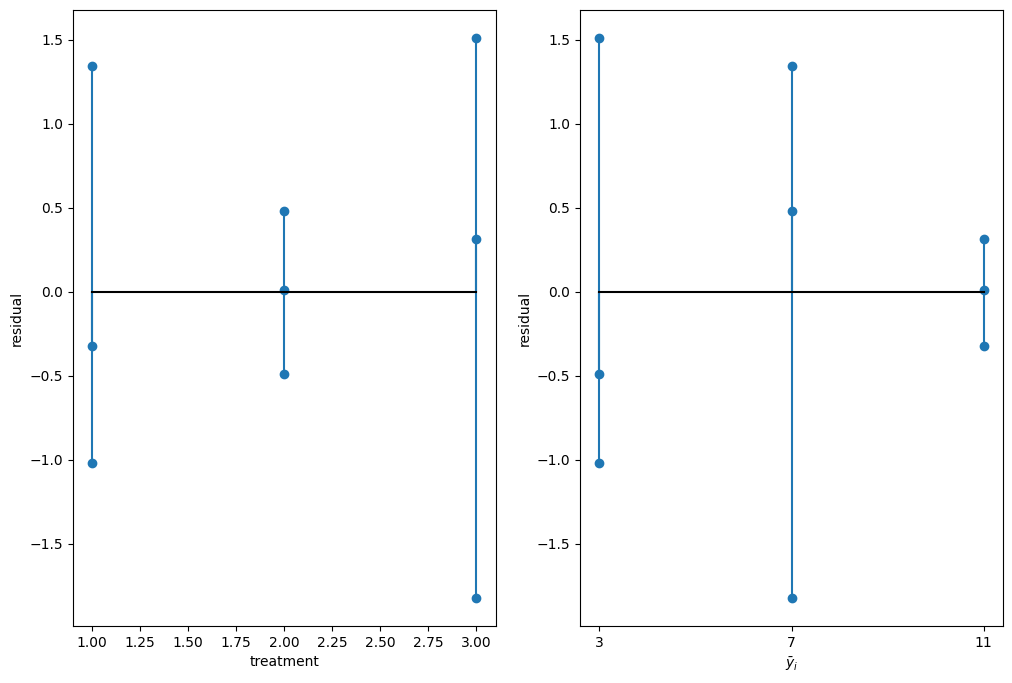

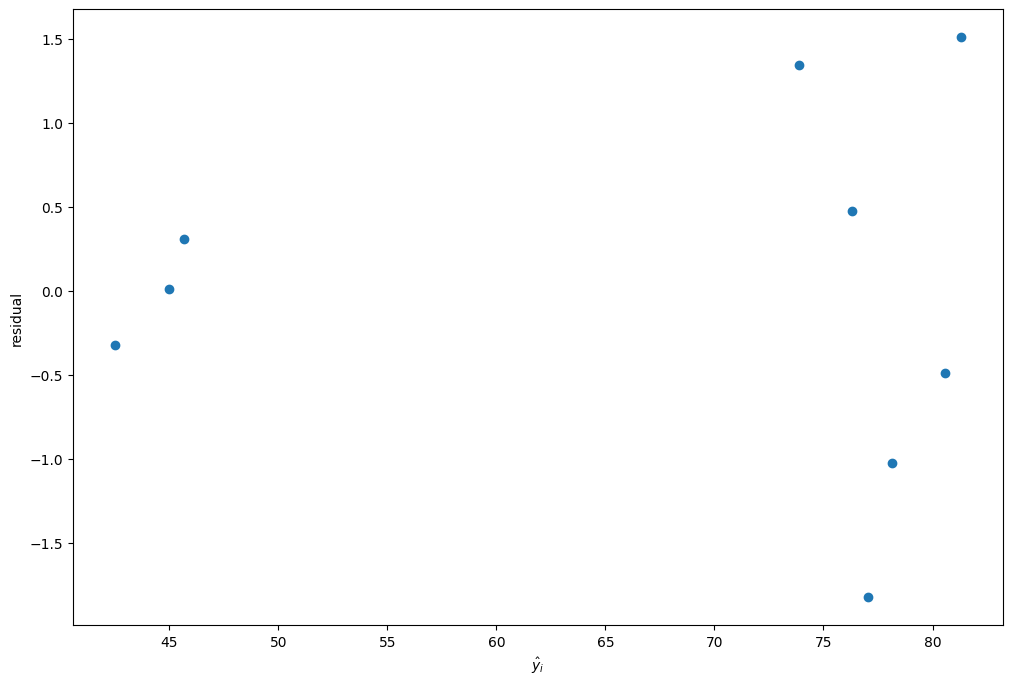

In [32]:
Data_b.res_plot()

In [45]:
std2 = df[1].values.std()
mean2 = mean[0]
t = stats.t.ppf(1-alpha/2, n, a)
xmin = mean2 - t*std2/(np.sqrt(n))
xmax = mean2 + t*std2/(np.sqrt(n))

mu = np.array([xmin, xmax])

print(mu)

[  7.64035209 122.02631458]


# A

Doordat $p = 0.125 > \alpha$ blijkt er volgens de anova analys geen significant verschil tussen de treatments.

# B

Uit de residu-anlyse blijkt er een constant verband te zijn tussen de residuals. Hieruit kan geconcludeerd worden dat er een externe factor aanwezig is.

# C


In [56]:
from IPython.display import Markdown as md

md(f"$${xmin.round(2)} \leq \mu \leq{xmax.round(2)}")

$$7.64 \leq \mu \leq122.03

# D

Als blokken worden meegenomen blijkt uit de anova analyse dat er geen significant verschil is tussen de treatments. Echter vertonen 1 en 3 verschillen volgens de LSD analyse.